In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import dotenv
import matplotlib.pyplot as plt
import matplotlib.ticker
import numpy as np
import scipy.signal
%matplotlib inline

In [3]:
# Load environment variables
dotenv.load_dotenv()

# Enable loading of the project module
MODULE_DIR = os.path.join(os.path.abspath(os.path.join(os.path.curdir, os.path.pardir)), 'src')
sys.path.append(MODULE_DIR)

try:
    PLOT_BASE_DIR = os.path.abspath(os.environ["PLOT_BASE_DIR"])
except KeyError:
    raise RuntimeError("Missing plot output dir. Set the PLOT_BASE_DIR variable accordingly")
os.makedirs(PLOT_BASE_DIR, exist_ok=True)


In [4]:
import plot_util
plot_util.setup_matplotlib()

In [5]:
REG_STYLE_MAP = {
    "int": ("C0", plot_util.LINESTYLE_MAP[0]),
    "reg": ("C1", plot_util.LINESTYLE_MAP[1]),
}

## Interpolating vs regularized

In [6]:
BETA_CAPTION = r"$\beta$ s.t.\ filter size $q \in \Theta\mathopen{}\left(d^\beta\right)\mathclose{}$"


In [7]:
import theory

beta_star, betas, rate_error_int, rate_error_reg, rate_var, rate_bias = theory.Plots(
    b_points=10000, l=2, l_sigma=0.6, L_star=2, beta_min=0.1, tol=0.000001
)

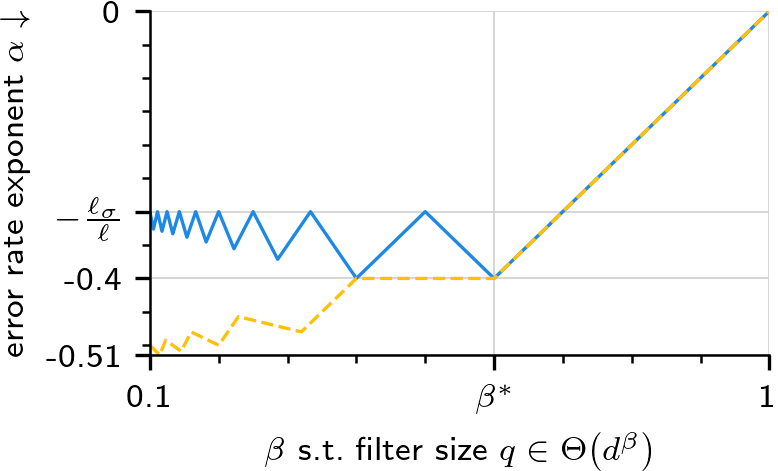

In [8]:
fig, ax = plt.subplots(
    figsize=(plot_util.FIGURE_WIDTH_FOR_COLUMNS_IN[6], plot_util.FIGURE_WIDTH_FOR_COLUMNS_IN[6] / plot_util.GOLDEN_RATIO)
)

current_color, current_linestyle = REG_STYLE_MAP["int"]
ax.plot(
    betas,
    rate_error_int,
    c=current_color,
    label=r"interpolating",
    ls=current_linestyle,
)
current_color, current_linestyle = REG_STYLE_MAP["reg"]
ax.plot(
    betas,
    rate_error_reg,
    c=current_color,
    label=r"optimally regularized",
    ls=current_linestyle,
)

beta_star_idx = int(np.argwhere(betas == beta_star))

ax.set_ylim(-0.45, 0.0)
ax.set_yticks((
    rate_error_reg.min(),
    rate_error_int[beta_star_idx],
    rate_error_int[:beta_star_idx].max(),
    0.0
))
ax.set_yticklabels((
    round(rate_error_reg.min(), 2),
    round(rate_error_int[beta_star_idx], 2),
    r"$-\frac{\ell_{\sigma}}{\ell}$",
    "0"
))
ax.yaxis.set_minor_locator(matplotlib.ticker.FixedLocator(
    np.linspace(-0.5, 0.0, num=11)
))
ax.set_ylabel(r"error rate exponent $\alpha$ $\downarrow$")

ax.set_xlim(0.1, 1.0)
ax.set_xticks((0.1, beta_star, 1.0))
ax.set_xticklabels(("0.1", r"$\beta^*$", "1"))
ax.xaxis.set_minor_locator(matplotlib.ticker.FixedLocator(
    np.linspace(0.1, 1.0, num=10)
))
ax.set_xlabel(BETA_CAPTION)

plt.show()

fig.savefig(os.path.join(PLOT_BASE_DIR, "rates.pdf"))

plt.close(fig)

legend_fig = plt.figure(figsize=(
    plot_util.FIGURE_WIDTH_FOR_COLUMNS_IN[6],
    plot_util.LEGEND_HEIGHT_FOR_ROWS_IN[1],
))
handles, labels = ax.get_legend_handles_labels()
legend_fig.legend(
    handles,
    labels,
    loc='center',
    ncol=len(handles),
    frameon=False,
    borderpad=0.5,
)

legend_fig.savefig(os.path.join(PLOT_BASE_DIR, "rates_legend.pdf"))

plt.close(legend_fig)

## Bias vs. variance

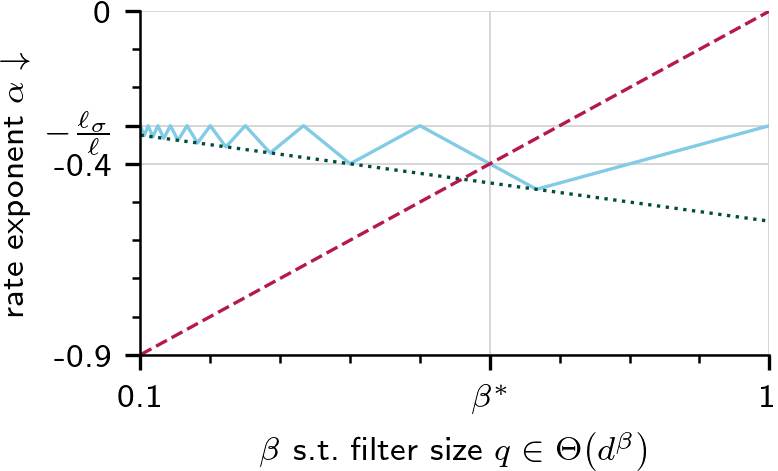

In [9]:
fig, ax = plt.subplots(
    figsize=(plot_util.FIGURE_WIDTH_FOR_COLUMNS_IN[6], plot_util.FIGURE_WIDTH_FOR_COLUMNS_IN[6] / plot_util.GOLDEN_RATIO)
)

ax.plot(
    betas,
    rate_var,
    c="C3",
    label=fr"variance",
    ls=plot_util.LINESTYLE_MAP[0],
)
ax.plot(
    betas,
    rate_bias,
    c="C2",
    label=r"$\mathsf{bias}^2$",
    ls=plot_util.LINESTYLE_MAP[1],
)

var_minima, = scipy.signal.argrelmin(rate_var)
var_rate_a = (rate_var[var_minima[-1]] - rate_var[var_minima[0]]) / (betas[var_minima[-1]] - betas[var_minima[0]])
var_rate_b = rate_var[var_minima[0]]
ax.plot(
    (betas[0], betas[-1]),
    (
        var_rate_a * (betas[0] - betas[var_minima[0]]) + var_rate_b,
        var_rate_a * (betas[-1] - betas[var_minima[0]]) + var_rate_b
    ),
    c="C5",
    ls=plot_util.LINESTYLE_MAP[2],
    label=r"var.\ lower bound"
)

beta_star_idx = int(np.argwhere(betas == beta_star))

ax.set_ylim(-0.9, 0.0)
ax.set_yticks((
    -0.9,
    rate_var[beta_star_idx],
    rate_var.max(),
    0.0
))
ax.set_yticklabels((
    -0.9,
    round(rate_error_int[beta_star_idx], 2),
    r"$-\frac{\ell_{\sigma}}{\ell}$",
    "0"
))
ax.yaxis.set_minor_locator(matplotlib.ticker.FixedLocator(
    np.linspace(-0.9, 0.0, num=10)
))
ax.set_ylabel(r"rate exponent $\alpha$ $\downarrow$")

ax.set_xlim(0.1, 1.0)
ax.set_xticks((0.1, beta_star, 1.0))
ax.set_xticklabels(("0.1", r"$\beta^*$", "1"))
ax.xaxis.set_minor_locator(matplotlib.ticker.FixedLocator(
    np.linspace(0.1, 1.0, num=10)
))
ax.set_xlabel(BETA_CAPTION)

plt.show()

fig.savefig(os.path.join(PLOT_BASE_DIR, "tradeoff.pdf"))

plt.close(fig)

legend_fig = plt.figure(figsize=(
    plot_util.FIGURE_WIDTH_FOR_COLUMNS_IN[6],
    plot_util.LEGEND_HEIGHT_FOR_ROWS_IN[1],
))
handles, labels = ax.get_legend_handles_labels()
legend_fig.legend(
    handles,
    labels,
    loc='center',
    ncol=len(handles),
    frameon=False,
    borderpad=0.5,
)

legend_fig.savefig(os.path.join(PLOT_BASE_DIR, "tradeoff_legend.pdf"))

plt.close(legend_fig)